In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.legend_handler import HandlerTuple

# Set matplotlib font to resemble LaTeX's default font (Computer Modern)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.usetex'] = True

In [2]:
# create color patterns
import colors

orange = ["#ffac00"]
darkorange = ["#c46e00"]
blue = ["#0F52BA"]
gold = ["#FFA000"]
green = ["#61a842"]
darkgreen = ["#2c853c"]
red = ["#e85c47"]
brown = ["#98733a"]
purple = ["#cb5fb1"]
qt_red = ["#B22222"]
c0_blue = ["#1f77b4"]
c1_orange = ["#ff7f0e"]
alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
beta = [0.9,0.8,0.6,0.4,0.2,0.1]
for i,c in enumerate(alpha):
        orange.append(colors.get_alpha_hex(orange[0],beta[i]))
        darkorange.append(colors.get_alpha_hex(darkorange[0],beta[i]))
        blue.append(colors.get_alpha_hex(blue[0],beta[i]))
        gold.append(colors.get_alpha_hex(gold[0],beta[i]))
        green.append(colors.get_alpha_hex(green[0],beta[i]))
        darkgreen.append(colors.get_alpha_hex(darkgreen[0],beta[i]))
        red.append(colors.get_alpha_hex(red[0],beta[i]))
        brown.append(colors.get_alpha_hex(brown[0],beta[i]))
        purple.append(colors.get_alpha_hex(purple[0],beta[i]))
        qt_red.append(colors.get_alpha_hex(qt_red[0],beta[i]))
        c0_blue.append(colors.get_alpha_hex(c0_blue[0],beta[i]))
        c1_orange.append(colors.get_alpha_hex(c1_orange[0],beta[i]))

In [3]:
### QT and ME data (from QuTip)
data_me_run = np.load("../data/me_run_ghz_state_preparation_nqubit10.npz")
t_list_me = data_me_run['tlist']
fidelity_me = data_me_run['expect']

t_list = np.linspace(0,540,55)

data_qt_run = np.load("../data/mc_run_ghz_state_preparation_10nqubits_2100ntraj.npz")
fidelity_qt_mean = data_qt_run['expect']
finally_qt_std = data_qt_run['std']

qt_nqubit = [6,8,10,12,14,16]
data_qt_runtime = np.load("../data/ghz_qt_run_time.npz")
qt_runtime_mean = data_qt_runtime['qt_runtime_mean']
qt_runtime_lb   = data_qt_runtime['qt_runtime_lb']
qt_runtime_ub   = data_qt_runtime['qt_runtime_ub']

### QMC data
data_qmc_run = np.load("../data/qmc_ghz_state_preparation_10qubit_benchmark.npz")
fidelity_qmc_mean = data_qmc_run['fidelity_mean']
fidelity_qmc_ue   = data_qmc_run['fidelity_ub'] - fidelity_qmc_mean
fidelity_qmc_le   = fidelity_qmc_mean - data_qmc_run['fidelity_lb']
Nw_diag_re_mean = data_qmc_run['Nw_diag_re_mean']
Nw_diag_im_mean = data_qmc_run['Nw_diag_im_mean']
Nw_diag_im_ub   = data_qmc_run['Nw_diag_im_ub']
Nw_diag_im_lb   = data_qmc_run['Nw_diag_im_lb']
data_walker_number = np.load("../data/qmc_ghz_state_preparation_walker_count_10qubit.npz")

Nw_tot_index = [0,1,6,7,12,13,18,19,24,25,30,31,36,37,42,43,48,49,54] # we just marker significant values
Nw_tot = data_walker_number['Nw_tot']

data_qmc_time = np.load("../data/qmc_ghz_state_preparation_time.npz")
qmc_nqubit = data_qmc_time['nqubit']
qmc_time = data_qmc_time['qmc_time_list']

### Final state fidelity
data_fidelity_fin = np.load("../data/ghz_state_preparation_final_fidelity.npz")
fidelity_fin_qmc_mean = data_fidelity_fin['qmc_mean']
fidelity_fin_qmc_err = data_fidelity_fin['qmc_err']
fidelity_fin_qt_mean = data_fidelity_fin['qt_mean']
fidelity_fin_qt_err = data_fidelity_fin['qt_err']

/var/folders/zw/mls6dy0526nbvp33kfmr9vdw0000gn/T/ipykernel_71286/3928550755.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


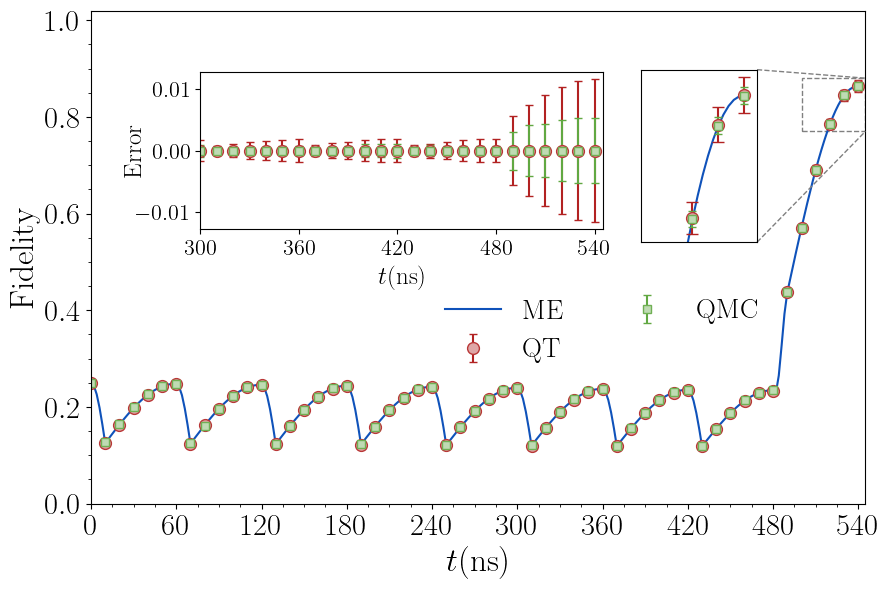

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

ax.plot(t_list_me, np.real(fidelity_me), lw=1.5, color=blue[0], label="ME")

ax.errorbar(t_list, np.real(fidelity_qt_mean[0:55]), yerr=1.96 * finally_qt_std[0:55] / np.sqrt(2100), 
            label='QT',
            fmt='o', markersize=8.5, capsize=3,
            color=qt_red[1], markerfacecolor=qt_red[4], ecolor=qt_red[0]
        )
ax.errorbar(t_list, fidelity_qmc_mean, yerr=[fidelity_qmc_le, fidelity_qmc_ue], 
            label='QMC',
            fmt='s',  markersize=6, capsize=3,
            color=green[1], markerfacecolor=green[4], ecolor=green[0]
        )

# axis
ax.set_xlabel(r'$t (\mathrm{ns})$', fontsize=24)
ax.set_ylabel("Fidelity", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.set_xlim(0,545)
ax.set_xticks(range(0, 545, 60))
ax.set_ylim(0,1.02)
ax.minorticks_on()

# inset plot
def position_inset(base_ax, inset, x, y, width, height):
    def inset_locator(ax, renderer):
        bbox = base_ax.get_position()
        return [bbox.x0 + x*bbox.width, bbox.y0 + y*bbox.height, bbox.width * width, bbox.height * height]
    inset.set_axes_locator(inset_locator)

axins = zoomed_inset_axes(ax, zoom=1, loc='upper right')
axins.set_xticks([])
axins.set_yticks([])
axins.set_xlim(500, 545)
axins.set_ylim(0.77, 0.88)
position_inset(ax, axins, 0.71, 0.53, 0.15, 0.35)

axins.plot(t_list_me, np.real(fidelity_me), lw=1.5, color=blue[0], label="ME")

axins.errorbar(t_list, np.real(fidelity_qt_mean[0:55]), yerr=1.96 * finally_qt_std[0:55] / np.sqrt(2100), 
            label='QT',
            fmt='o', markersize=8.5, capsize=4,
            color=qt_red[1], markerfacecolor=qt_red[4], ecolor=qt_red[0]
        )
axins.errorbar(t_list, fidelity_qmc_mean, yerr=[fidelity_qmc_le, fidelity_qmc_ue], 
            label='QMC',
            fmt='s',  markersize=6, capsize=3,
            color=green[1], markerfacecolor=green[4], ecolor=green[0]
        )
mark_inset(ax, axins, loc1=4, loc2=1, fc="none", ec="0.5", linestyle='--')

# walkers plot
ax_errorbar = inset_axes(ax, width="80%", height="80%", 
                    bbox_to_anchor=(0.02, 0.49, 0.65, 0.40),
                    bbox_transform=ax.transAxes)
ax_errorbar.errorbar(t_list, np.zeros(55), yerr=1.96 * finally_qt_std[0:55] / np.sqrt(2100), 
            fmt='o', markersize=8.5, capsize=3,
            color=qt_red[1], markerfacecolor=qt_red[4], ecolor=qt_red[0]
        )
ax_errorbar.errorbar(t_list, np.zeros(55), yerr=[fidelity_qmc_le, fidelity_qmc_le], 
            fmt='s', markersize=6, capsize=3,
            color=green[1], markerfacecolor=green[4], ecolor=green[0]
        )
ax_errorbar.set_xlim(300,545)
ax_errorbar.set_xticks(range(300, 545, 60))
ax_errorbar.set_ylabel('Error', fontsize=18, labelpad=-8)
ax_errorbar.set_xlabel(r'$t (\mathrm{ns})$', fontsize=18)
ax_errorbar.tick_params(axis='both', labelsize=16)

# legend
ax.legend(
    bbox_to_anchor=(0.66, 0.35), frameon = False,
    ncol=2, fontsize=20, loc='center')

plt.tight_layout()
plt.savefig("../fig/ghz_benchmark_10qubit.pdf")
plt.savefig("../fig/ghz_benchmark_10qubit.svg")

/var/folders/zw/mls6dy0526nbvp33kfmr9vdw0000gn/T/ipykernel_71286/2815542847.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


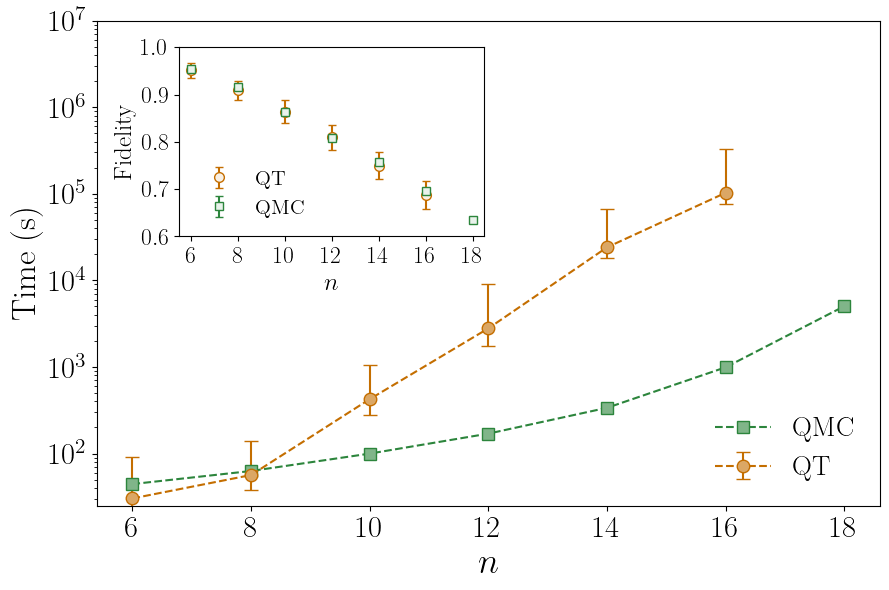

In [ ]:
fig, ax_scaling = plt.subplots(1, 1, figsize=(9, 6))

ax_scaling.set_ylabel('Time (s)', fontsize=24)
ax_scaling.set_yscale('log')
ax_scaling.set_xlabel(r'$n$', fontsize=26)
ax_scaling.tick_params(axis='both', which='major', labelsize=22)

ax_scaling.errorbar(qt_nqubit, qt_runtime_mean, yerr=[qt_runtime_lb, qt_runtime_ub],
                linestyle='--', marker='o', markersize=9, capsize=5,
                markerfacecolor=darkorange[3], color=darkorange[0], label='QT')
ax_scaling.plot(qmc_nqubit, qmc_time, 
                linestyle='--', marker='s', markersize=8,
                markerfacecolor=darkgreen[3], color=darkgreen[0], label='QMC')

ax_scaling.set_ylim(25, 1e7)

ax_fidelity = inset_axes(ax_scaling, width="65%", height="65%", 
                    bbox_to_anchor=(0.00, 0.45, 0.6, 0.6),
                    bbox_transform=ax_scaling.transAxes,
                    loc='center')
ax_fidelity.errorbar(qt_nqubit, fidelity_fin_qt_mean, yerr = fidelity_fin_qt_err, label='QT',
                     ls='none', marker='o', markersize=7, capsize=3,
                     markerfacecolor=darkorange[6], color=darkorange[0])
ax_fidelity.errorbar(qmc_nqubit, fidelity_fin_qmc_mean, yerr = fidelity_fin_qmc_err, label='QMC',
                     ls='none', marker='s', markersize=6, capsize=3,
                     markerfacecolor=darkgreen[6], color=darkgreen[0])

ax_fidelity.set_xlim(5.5, 18.5)
ax_fidelity.set_ylim(0.6, 1.0)
ax_fidelity.set_xticks(range(6, 19, 2))
ax_fidelity.set_xlabel(r'$n$', fontsize=18)
ax_fidelity.set_ylabel('Fidelity', fontsize=18)
ax_fidelity.tick_params(axis='both', which='major', labelsize=17)
ax_fidelity.legend(frameon = False, fontsize=15, loc='lower left')

ax_scaling.legend(frameon = False, fontsize=20, loc='lower right')

plt.tight_layout()
plt.savefig("../fig/ghz_time_scaling.pdf")
plt.savefig("../fig/ghz_time_scaling.svg")